<a href="https://colab.research.google.com/github/ah1997/Stochastic/blob/Sandpile/poissonprocsim1_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MS763: Applied Markov Processes | Simulation of the Poisson processes

Hugo Touchette

Last updated: 24 September 2020

Python 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [ ]:
# Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

## Discrete time method

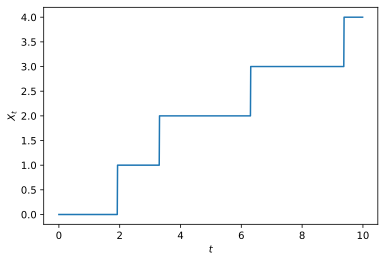

In [ ]:
alpha = 0.5
tfinal = 10.0
dt = 0.01

nsteps = int(tfinal/dt)
Nslist = np.zeros(nsteps, int)

Ns=0
Nslist[0] = Ns

# Time loop to generate trajectory
for i in range(nsteps-1):

    # Attempt a jump with probability alpha*dt
    r = np.random.random()
    if r < alpha*dt:
        Ns += 1

    # Keep state in trajectory
    Nslist[i+1] = Ns

# Plot trajectory
plt.plot(np.array(range(nsteps))*dt, Nslist)
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$');

## Random jump time method

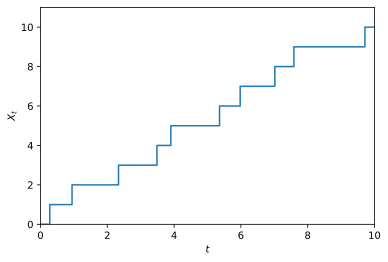

In [ ]:
alpha = 0.5
tfinal = 10.0

Nslist = []  # List for states visited
timelist = []  # List of residence times
Ns = 0  # Initial state
t = 0.0  # Running time

Nslist.append(Ns)
timelist.append(t)

# Initialise figure
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate jumps until final time is reached
while t < tfinal:
    # Generate random time for jump
    tau = np.random.exponential(1/alpha)

    # Increment running time
    t += tau

    # Make jump
    Ns += 1

    # Keep states before and after jump
    Nslist.append(Ns-1)
    Nslist.append(Ns)
    timelist.append(t)
    timelist.append(t)

# Add state at final time
Nslist.append(Ns-1)
timelist.append(tfinal)

# Plot trajectory as bunch of lines with set of points
currentNsmax = max(Nslist)
lines = Line2D(timelist, Nslist)
ax.add_line(lines)

# Set figure view
ax.set_xlim(0.0, tfinal)
ax.set_ylim(0.0, currentNsmax)
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$')